## 9.3 主成分分析(PCA)
關鍵詞： PCA・固有值・固有向量・次元縮減・線形判別分析

本次將介紹「主成分分析（principle component analysis，PCA）」。如先前所見，資料通常含有很多變數，如金融行銷資料等更是包含許多不同的解釋變數。當解釋變數的數量變多時，要逐一檢視它們的關係並不容易，因此若能將解釋變數的維度降低，就能更容易掌握資料的全貌。

主成分分析能在不損失太多原始資訊的情況下，將高維度資料壓縮到較低的維度，並常被使用於探索式分析的前處理、或建構預測模型的前處理流程。此外，學習或分類分析等，也可以運用主成分分析做適度的維度縮減（或線形判別分析）。有興趣的讀者可以進一步比較這幾種方法的差異。

### 9.3.1 嘗試主成分分析


這裡先用簡單的範例資料來看看主成分分析究竟在做什麼。接下來的程式碼使用 RandomState 物件產生 2 個變數的資料集，並對這些變數進行標準化之後再繪圖。

首先，將 np.Random.RandomState(1) 作為亂數種子，並建立一個 RandomState 物件。

接著，我們使用 rand 函式與 randn 函式生成兩個亂數（其中一個用於 dot 乘法），得到 2 維的資料集。可以看到，這些變數之間的相互關係頗為密切，透過標準化之後，我們會再觀察它們的相關係數。以下的範例程式中顯示，這兩個變數的相關係數約為 0.889，屬於相當強的線性相關。另外，我們也要注意到標準化後的資料，其平均值約為 0，標準差約為 1。

若想更深入瞭解為什麼這組資料的相關係數特別高，可以參考一些關於資料產生機制與分布特性的參考文獻。

相関係数0.889


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27161 (\N{CJK UNIFIED IDEOGRAPH-6A19}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28310 (\N{CJK UNIFIED IDEOGRAPH-6E96}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

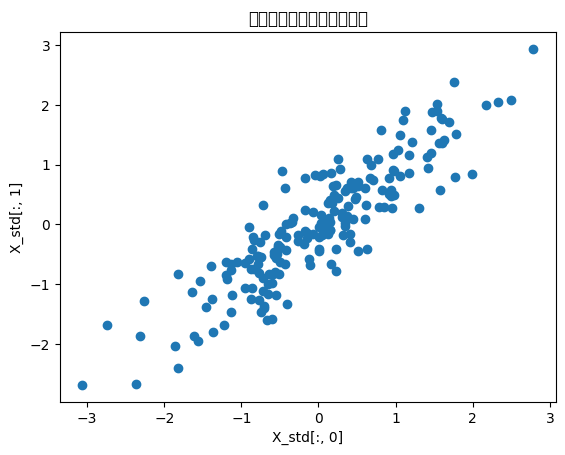

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler

sample = np.random.RandomState(1)  #製作RandomState的物件


X = np.dot(sample.rand(2, 2), sample.randn(2, 200)).T   # 二個亂數的生成

# 標準化
sc = StandardScaler()
X_std = sc.fit_transform(X)

# 計算相關係數及標準化
# sp.stats.pearsonr => stats.pearsonr に修正
print('相関係数{:.3f}'.format(stats.pearsonr(X_std[:, 0], X_std[:, 1])[0]))
plt.scatter(X_std[:, 0], X_std[:, 1])
plt.xlabel("X_std[:, 0]")
plt.ylabel("X_std[:, 1]")
plt.title("標準化後的二維數據散佈圖")
plt.show()

#### 主成分分析的執行

主成分分析可以透過 sklearn.decomposition 模組中的 PCA 類別來執行。在建立 PCA 物件時，需要指定想要壓縮到幾個維度（n_components 參數）。一般而言，我們會選擇比原始資料的變數數量更小的值（例如從 30 個變數降到 5 個），但在這個範例中，我們設定為 2，並對同樣 2 維的資料進行 PCA。呼叫 fit 方法之後，就會計算出進行主成分分析所需的資訊（實際上會計算固有值和固有向量）。

In [ ]:
# 匯入
from sklearn.decomposition import PCA

# 主成分分析
pca = PCA(n_components=2)
pca.fit(X_std)

PCA(n_components=2)

学習結果的確認

接下來，我們檢視 PCA 物件的學習結果，即 components_、explained_variance_、explained_variance_ratio_ 等屬性

##### ①components_属性
components_ 屬性對應到主成分分析找到的「固有向量（eigenvectors）」。這些向量代表新的特徵空間坐標軸的方向。
例如如果輸出是：
[[-0.707, -0.707],
[-0.707,  0.707]]

 其中第一列（[-0.707, -0.707]）代表第一主成分的軸方向，第二列（[-0.707, 0.707]）代表第二主成分的軸方向。

In [ ]:
print(pca.components_)

[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]


#### ②explained_variance_属性

explained_variance_ 屬性顯示各主成分的「分散量」。假設我們抽取了 2 個主成分，若輸出結果為 1.889 與 0.111，表示第一主成分所包含的分散為 1.889，第二主成分所包含的分散為 0.111。
分散（variance）即「資訊量」，所以第一主成分萃取了大部分資訊，第二主成分則萃取了少部分。

In [ ]:
print('各主成分的變異數:{}'.format(pca.explained_variance_))

各主成分的變異數:[1.89888438 0.11116588]


#### ③explained_variance_ratio_属性
explained_variance_ratio_ 屬性顯示「各主成分在總變異中所佔的比例」。若輸出結果為 [0.945, 0.055]，就表示第一主成分涵蓋了約 94.5% 的資訊量，而第二主成分涵蓋了約 5.5%。

In [ ]:
print('各主成分的變異數比例:{}'.format(pca.explained_variance_ratio_))

各主成分的變異數比例:[0.94469498 0.05530502]


如果只看這些數值，可能不容易想像實際情況如何。因此，範例中也提供了視覺化方法，下方的程式碼透過繪製「矢印（向量）」，來表示主成分分析得到的新特徵空間軸方向。分散最大的方向即第一主成分，分散次大的方向即第二主成分。

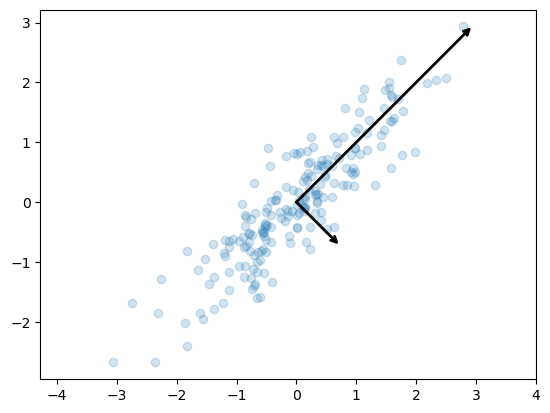

In [ ]:
# 參數設定
arrowprops=dict(arrowstyle='->',
                linewidth=2,
                shrinkA=0, shrinkB=0)

# 用來描繪箭頭的函式
def draw_vector(v0, v1):
    plt.gca().annotate('', v1, v0, arrowprops=arrowprops)

# 描繪原本的資料
plt.scatter(X_std[:, 0], X_std[:, 1], alpha=0.2)

# 以箭頭顯示主成分分析的2軸
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)

plt.axis('equal');

由圖中可見，第一主成分（向量如 [-0.707, -0.707]）對應到資料變異度最大的方向，第二主成分（向量如 [-0.707, 0.707]）則對應到次大的方向。兩者相互垂直，說明透過主成分分析，我們找到了新的正交軸來表示資料中最重要的變異方向。

## 9.3.2 主成分分析的實際範例


先前已介紹主成分分析的執行方法與處理流程，接下來讓我們實際使用主成分分析來進行降維，並瞭解其在什麼樣的情境下能派上用場。這裡以乳癌（Breast Cancer）的資料為例，來確認主成分分析的意義。

乳癌資料可以透過 sklearn.datasets 模組中的 load_breast_cancer 函式讀取。以下範例程式碼示範了如何讀取資料，並根據目標變數（cancer.target）的值是「malignant（惡性）」或「benign（良性）」來將各個解釋變數的分布可視化。

可以看到，在大多數的直方圖中，malignant 與 benign 的資料幾乎是重疊的。若要直接用這些特徵判斷惡性或良性，該如何劃定邊界線其實並不容易。

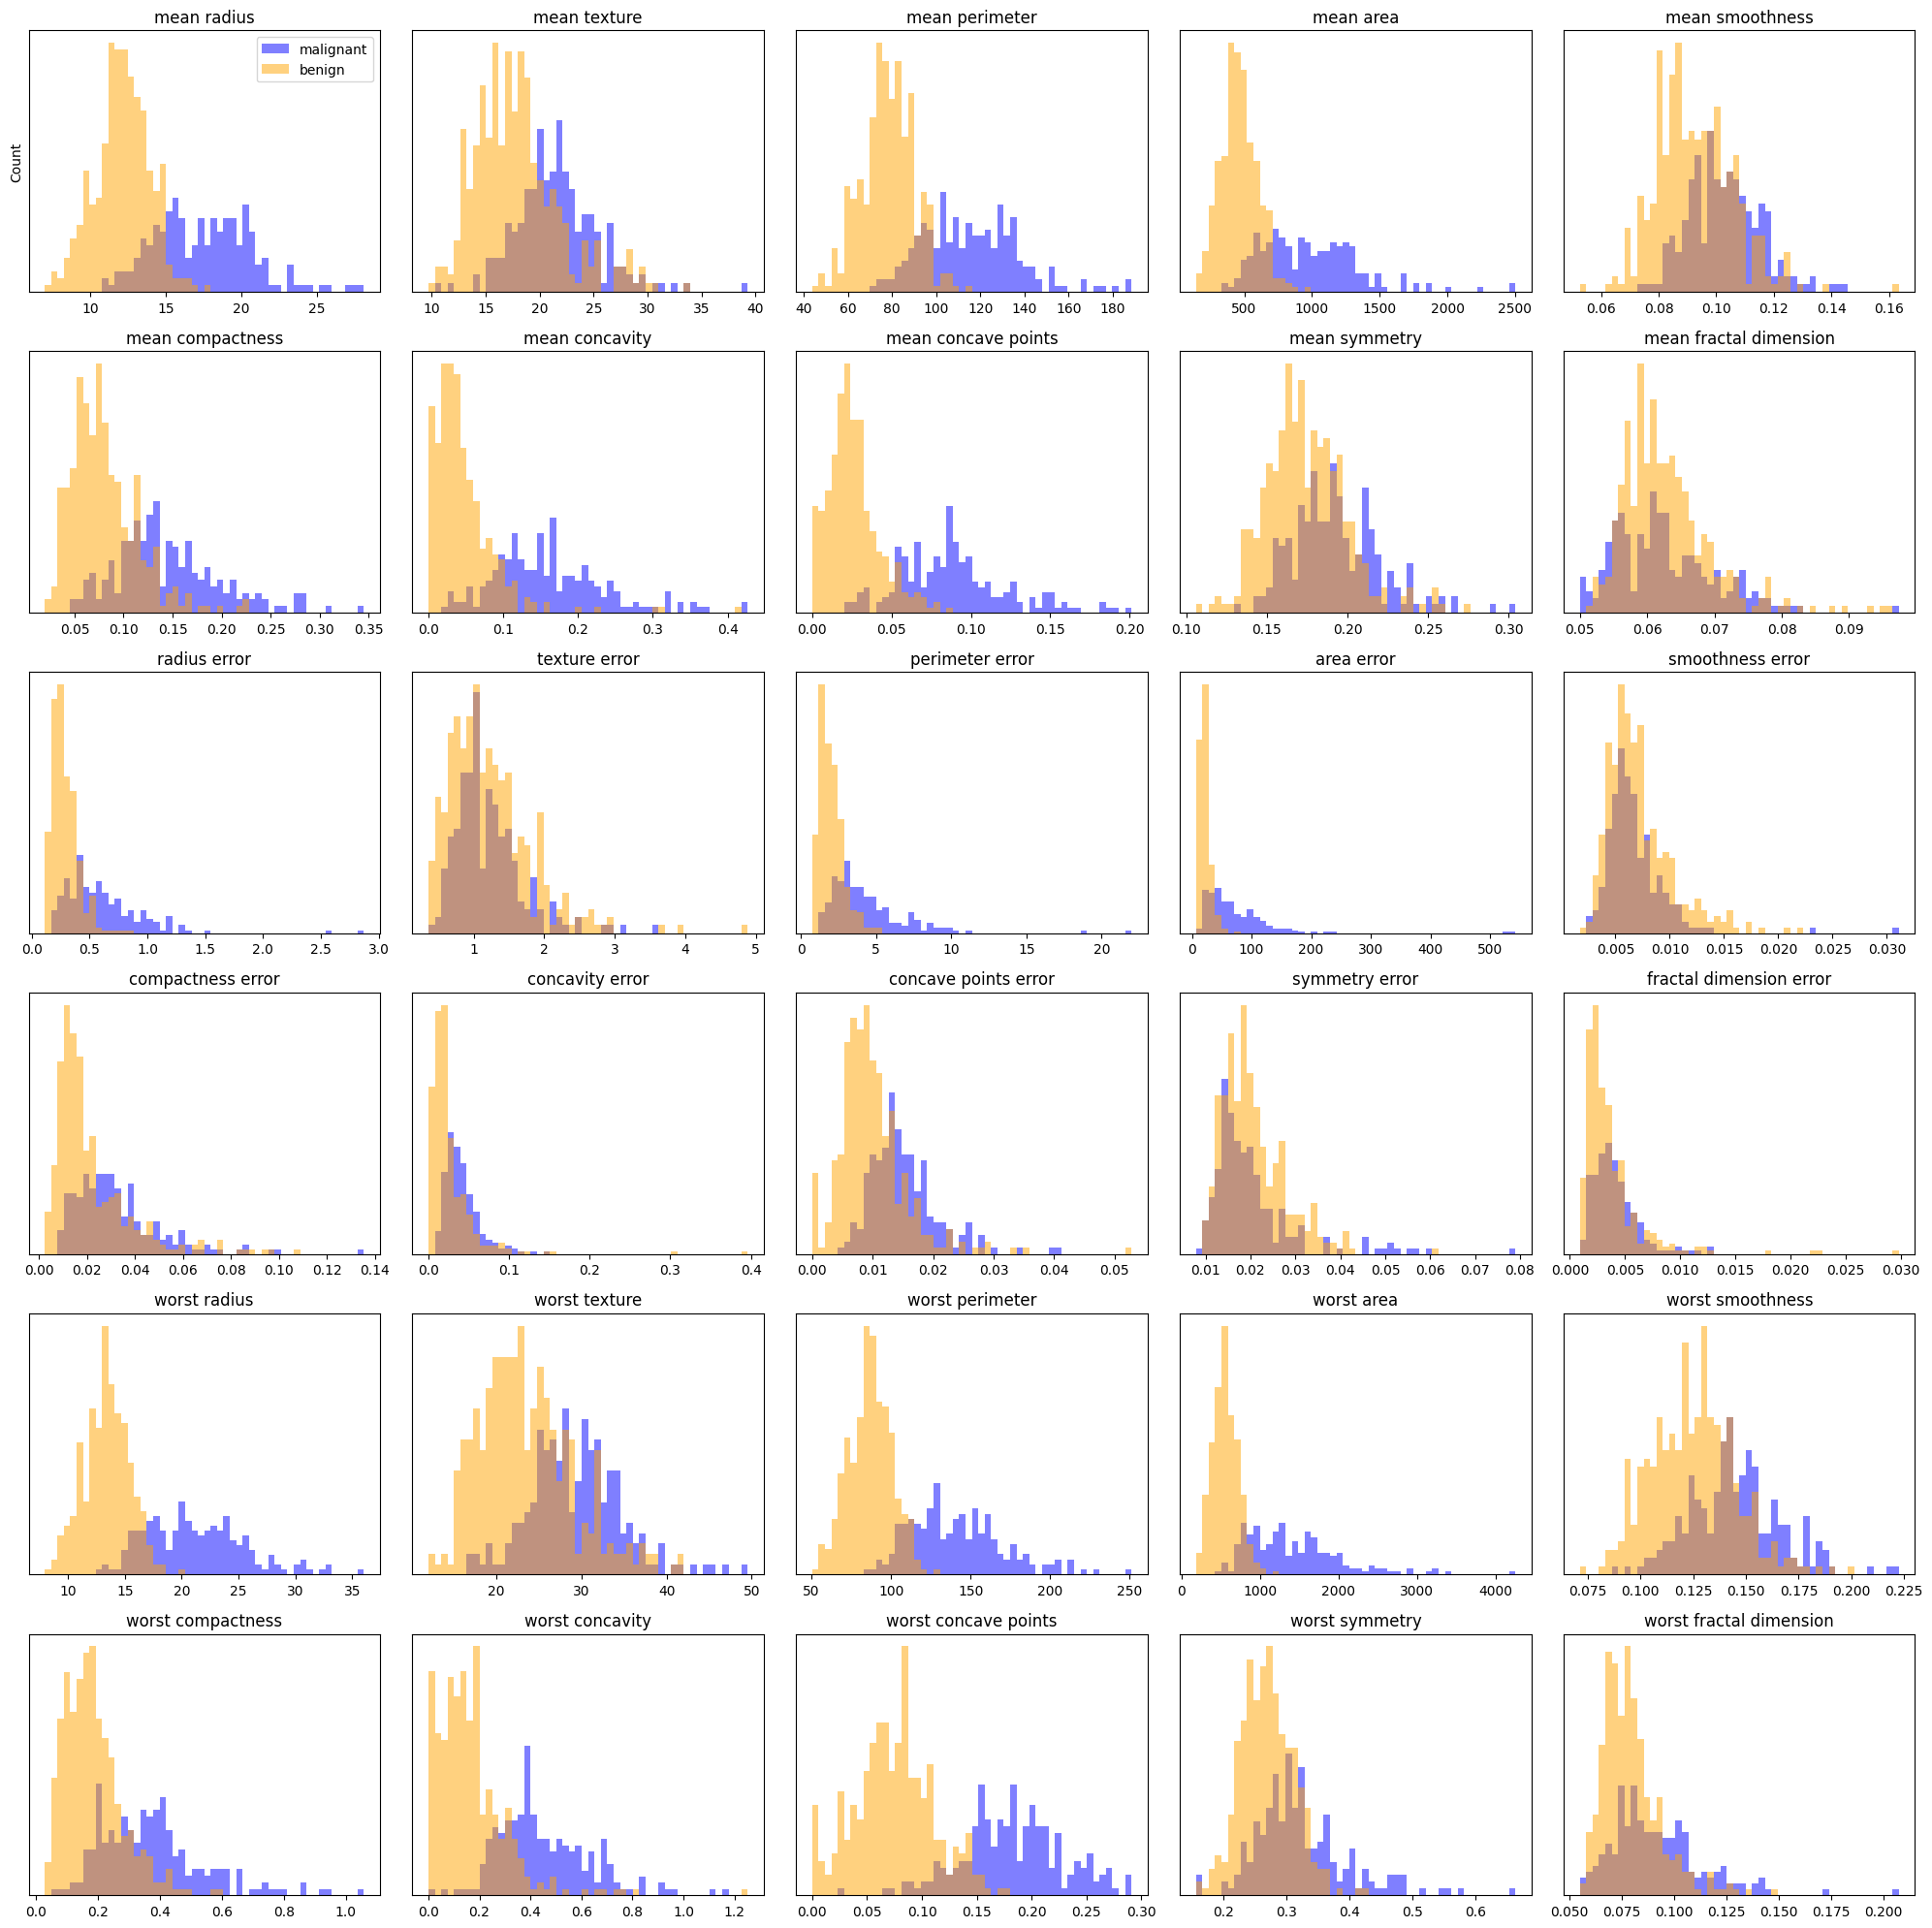

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# 讀取乳癌資料
cancer = load_breast_cancer()

# 將資料依 target 分為 malignant(惡性=0) 和 benign(良性=1)
malignant = cancer.data[cancer.target == 0]
benign    = cancer.data[cancer.target == 1]

# 建立 6 行 5 列的子圖，總共可放 30 個特徵的直方圖
fig, axes = plt.subplots(6, 5, figsize=(20, 20))
ax = axes.ravel()  # ravel() 讓 axes 陣列攤平成一維，方便用 ax[i] 來存取

# 逐一繪製 30 個特徵欄位的直方圖
for i in range(30):
    # 先用 np.histogram 拿到適當的 bin 邊界
    bin_edges = np.histogram(cancer.data[:, i], bins=50)[1]

    # 在相同的 bin 邊界上，分別繪製 malignant 與 benign 的直方圖
    ax[i].hist(malignant[:, i], bins=bin_edges, alpha=0.5, label='malignant', color='blue')
    ax[i].hist(benign[:, i], bins=bin_edges, alpha=0.5, label='benign', color='orange')

    # 設定每張子圖的標題（對應到 feature_names）
    ax[i].set_title(cancer.feature_names[i])
    # y 軸刻度可視需求隱藏，僅以空白列表代替
    ax[i].set_yticks([])

# 在第一張子圖加上 y 軸標籤與圖例
ax[0].set_ylabel('Count')
ax[0].legend(loc='best')

# 讓子圖之間不重疊
fig.tight_layout()
plt.show()

在上面的程式碼中，有這些腫瘤幾何形狀相關特徵


半徑 (Radius)：腫瘤的平均半徑。
周長 (Perimeter)：腫瘤的周長。
面積 (Area)：腫瘤的面積大小。
平滑度 (Smoothness)：腫瘤邊緣的平滑程度。
緊密度 (Compactness)：腫瘤形狀的緊密程度。
凹陷性 (Concavity)：腫瘤邊緣的凹陷程度。
凹點數量 (Concave Points)：腫瘤邊緣凹陷的點數。
對稱性 (Symmetry)：腫瘤的對稱性。
分形維度 (Fractal Dimension)：腫瘤邊緣的複雜程度




透過不同特徵欄位的直方圖可以看到，惡性與良性的分布大多重疊，需要更進一步的方法（例如主成分分析）來將資料做降維或特徵萃取，以協助我們更有效地區分或找出關鍵特徵。

接下來使用主成分分析，並嘗試將 20 多個以上的變數降為 2 個主成分。具體作法是先將解釋變數與目標變數標準化，然後進行主成分分析；最後設定要擷取的主成分數（n_components）為 2。

以下程式範例執行後，我們可以檢視 explained_variance_ratio_ 屬性的數值，看看新產生的兩個主成分可解釋多少原始資料的變異。結果顯示，雖然最終只剩下 2 個變數，但第一主成分與第二主成分已經能涵蓋原本約 63%（=0.443 + 0.19）的資訊。

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 標準化
sc = StandardScaler()
X_std = sc.fit_transform(cancer.data)

# 主成分分析
pca = PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

# 顯示
print("X_pca shape: {}".format(X_pca.shape))
print("Explained variance ratio: {}".format(pca.explained_variance_ratio_))

X_pca shape: (569, 2)
Explained variance ratio: [0.44272026 0.18971182]


由以上結果可以看到，X_pca 的形狀為 (569, 2)，表示降維後有 569 筆資料、每筆資料只剩下 2 個維度。儘管只剩下 2 維，卻已涵蓋了原始資料 63% 左右的資訊。

接著，我們把降維後的資料可視化。首先為了繪圖方便，將第一主成分與第二主成分的資料與目標變數（cancer.target）合併起來，再區分惡性與良性的資料繪製散佈圖。

<Axes: xlabel='pc1', ylabel='pc2'>

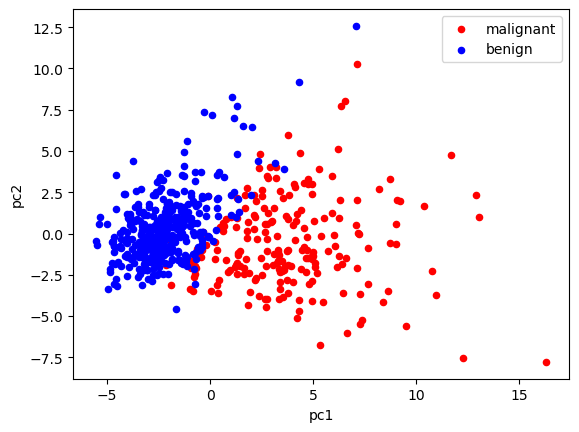

In [ ]:
import pandas as pd

# 建立 DataFrame，columns 分別為第一主成分 pc1、第二主成分 pc2
X_pca_df = pd.DataFrame(X_pca, columns=['pc1', 'pc2'])

# 將目標變數 (cancer.target) 加入 DataFrame，與 pc1、pc2 放在一起
X_pca_df = pd.concat([X_pca_df, pd.DataFrame(cancer.target, columns=['target'])], axis=1)

# 將資料依 target 進一步區分：0 表示 malignant（惡性），1 表示 benign（良性）
pca_malignant = X_pca_df[X_pca_df['target'] == 0]
pca_benign = X_pca_df[X_pca_df['target'] == 1]

# 繪製 scatter plot
ax = pca_malignant.plot.scatter(x='pc1', y='pc2', color='red', label='malignant')
pca_benign.plot.scatter(x='pc1', y='pc2', color='blue', label='benign', ax=ax)

從結果可以觀察到，僅用前兩個主成分，就能大致將惡性與良性區分開來。當資料集擁有大量的變數時，可以透過主成分分析將高維度的資料降維，以利更直觀地進行可視化、或在模型建構與預測時減少維度數量（降維），從而提升效能與可解釋性。